# 3D system based on ARACAM

# Libraries

In [1]:
import os
import nbimporter

from segmentation_color import segmentation, color_selection
from to_pointcloud import convert_to_pointcloud
from pointcloud_process import point_cloud_processing

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Working directory

In [2]:
# Directory  
model = 'M1'

# Parent Directory path  
parent_dir = "model demo/" 

# Path  
path = os.path.join(parent_dir, model)

try:  
    os.mkdir(path)  
except OSError as error:  
    print(error)

[WinError 183] Cannot create a file when that file already exists: 'model demo/M1'


## Segmentation
In this first iteration, plaster cast models are captured. Thous, the camera array is placed upside down on top of a table, allowing the models to rest on the middle of the setup. For faster segmentation a green cloth is placed to easily remove it by color segmentation.

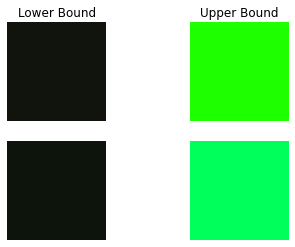

Original images


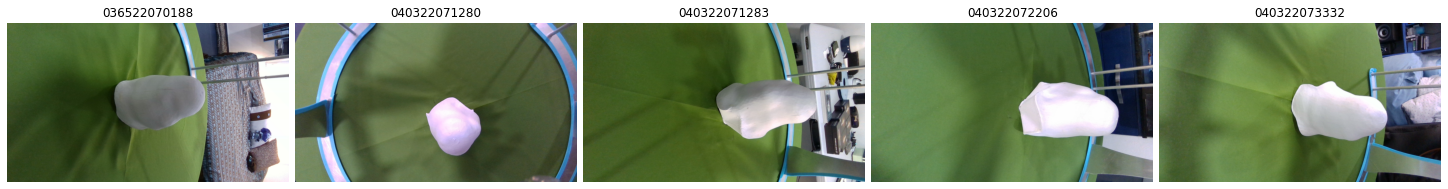

No background images


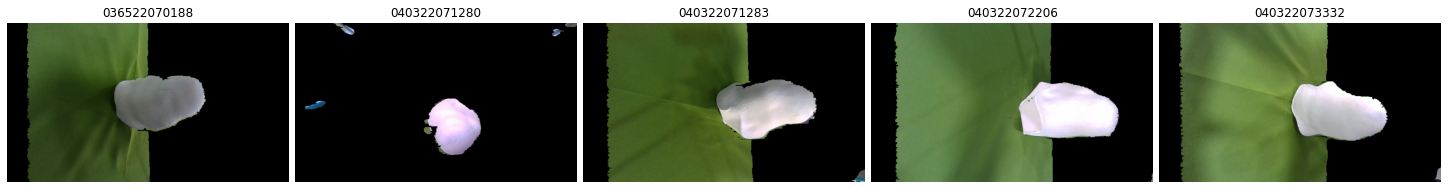

Color segmented


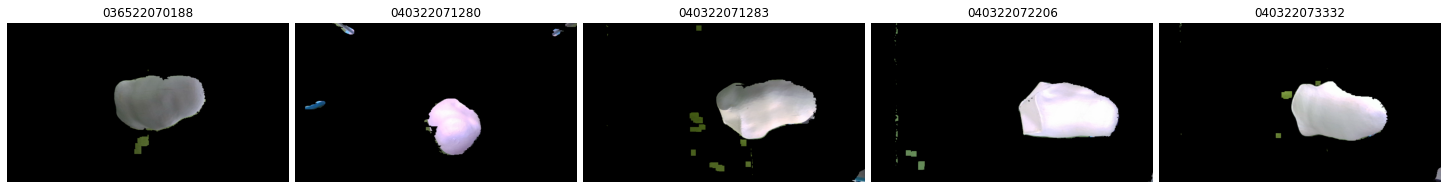

Region segmented


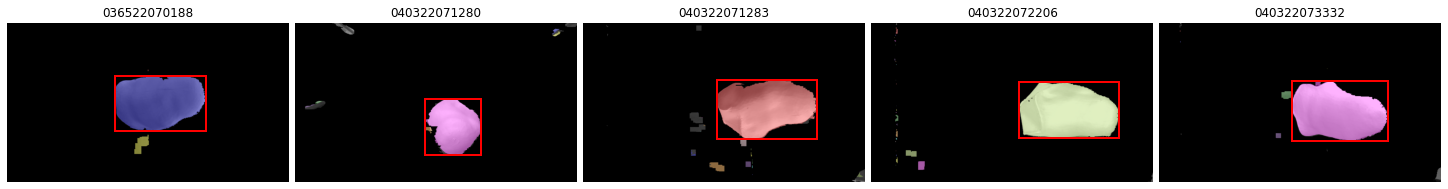

Mask


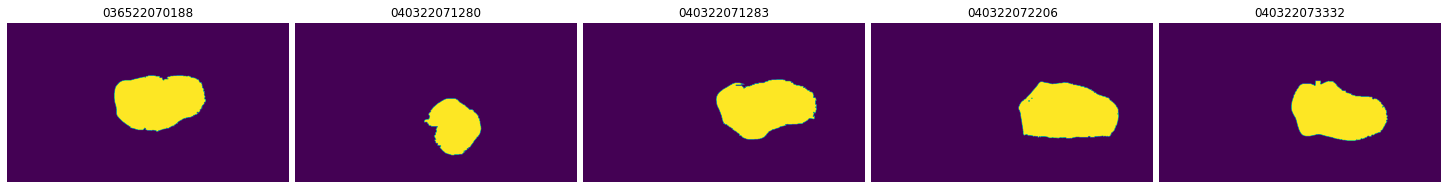

Mask smooth edges


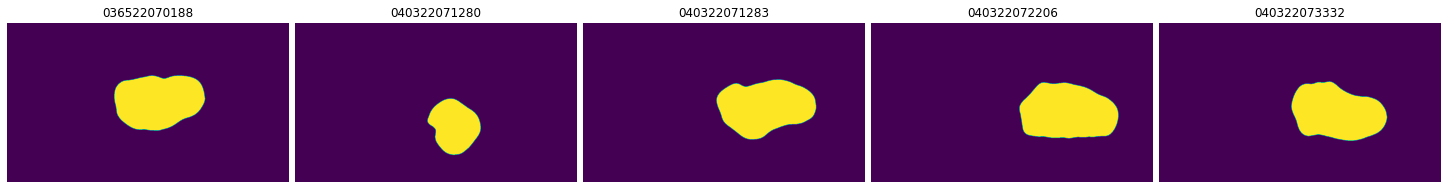

Mask erosion


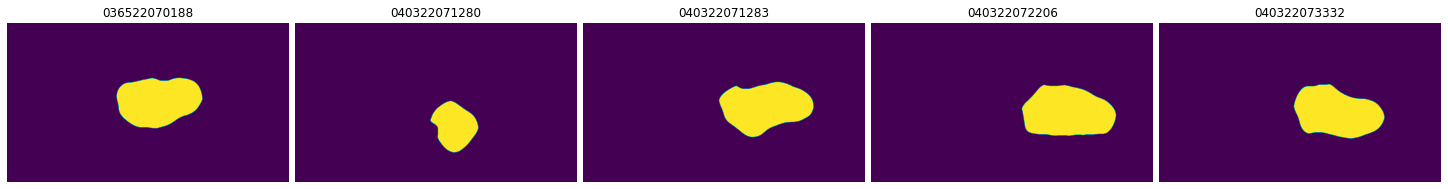

Result images


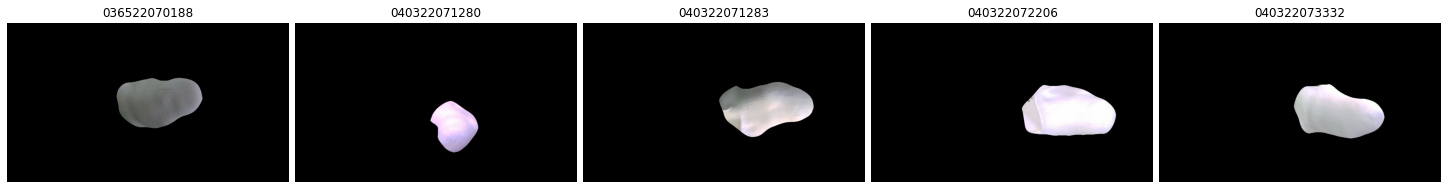

In [3]:
color_selection()
segmentation(path)

## Create point cloud
From the depth and color images, point clouds are created and exported to a .PLY format based in the script [create_pointCloud.py](https://gist.github.com/Shreeyak/9a4948891541cb32b501d058db227fff)

In [4]:
convert_to_pointcloud(path, model)

Creating the point Cloud file at :  model demo/M1/M1_036522070188.ply
Creating the point Cloud file at :  model demo/M1/M1_040322071280.ply
Creating the point Cloud file at :  model demo/M1/M1_040322071283.ply
Creating the point Cloud file at :  model demo/M1/M1_040322072206.ply
Creating the point Cloud file at :  model demo/M1/M1_040322073332.ply


## Reconstruction
This process needs to specify the **sequence_id** in which the reconstruction is going to take place. [Open3D](https://github.com/intel-isl/Open3D) is used throughout the process of global registration, fine alignment using ICP, surface reconstruction using Screen-Poisson and smoothing filters. The result is exported to a .PLY file format.

C:\Users\Mark\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Install ``panel`` to use this feature

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


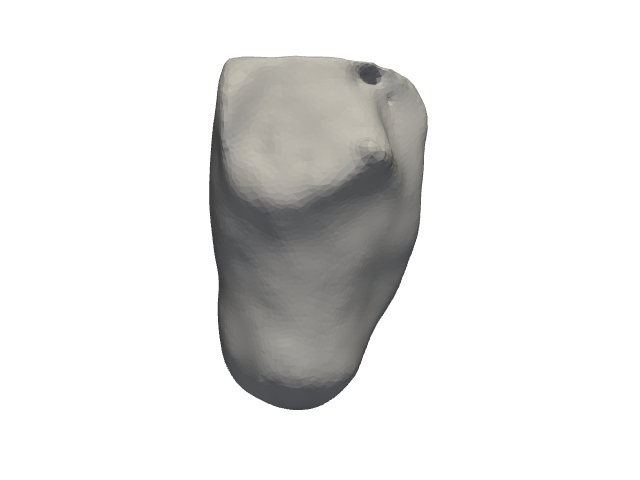

In [5]:
sequence_id = ['040322071283','036522070188', '040322073332','040322072206','040322071280'] # Cameras sequence around the object used for M1
point_cloud_processing(sequence_id, model, path)